<a href="https://colab.research.google.com/github/aimbsg/EVA4_S12/blob/master/EVA4_S12_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment A:
*   Download this TINY IMAGENET (Links to an external site.) dataset.
*   Train ResNet18 on this dataset (70/30 split) for 50 Epochs. Target 50%+ Validation Accuracy.
*   Submit Results. Of course, you are using your own package for everything. You can look at this (https://github.com/sonugiri1043/Train_ResNet_On_Tiny_ImageNet/blob/master/Train_ResNet_On_Tiny_ImageNet.ipynb) for reference.






In [0]:
import torch
from transforms_albumentation import *
from data_loader import *
from backbone import *
from train_test import *
from visualize_images import *
from gradcam import *
from model_evaluator import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd '/content/gdrive/My Drive/EVA4_S12_TinyImageNet/'

/content/gdrive/My Drive/EVA4_S12_TinyImageNet


In [0]:
import albumentations as A
import cv2
channel_means = (0.442,0.442,0.442)
channel_stdevs = (0.278, 0.278, 0.278)
train_transform = AlbumentationTransforms([       
                                                                
                                      A.HorizontalFlip(p = 0.7),
                                      A.PadIfNeeded(min_height=70, min_width=70, border_mode=4, always_apply=False, p=1.0),
                                      A.RandomCrop(64, 64, always_apply=False, p=1.0),
                                      A.Rotate(limit=30, interpolation=1, border_mode=4, always_apply=False, p=0.5),
                                      A.Normalize(mean=channel_means, std=channel_stdevs),
                                      A.Cutout(num_holes=1, max_h_size=32,max_w_size = 32,p=0.7) 
                                       ])
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])
train_dataset , test_dataset,classes = TinyImageNetDataSet(train_split = 70,test_transforms = test_transform,train_transforms = train_transform)

In [0]:
trainloader, testloader = load(train_dataset,test_dataset,batch_size=256)

In [0]:
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResNet18(num_classes=200).to(device)
summary(model, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR,StepLR

optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.0001,nesterov = True ) 
criterion = nn.CrossEntropyLoss()
scheduler = OneCycleLR(optimizer, max_lr = 0.02, total_steps=None, epochs=30, steps_per_epoch=len(trainloader), pct_start=1/3, anneal_strategy='linear', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=10.0,final_div_factor =10)

In [0]:
train_model(model,device,trainloader,testloader,optimizer,criterion,25,scheduler,batch_scheduler=True,best_acc = 0,path = "tinyimagenet_25epochs.pt")

EPOCH: 1 LR: 0.002




Test set: Average loss: 0.0168, Accuracy: 3300/33000 (10.00%)

accuracy increased, Saving model....
EPOCH: 2 LR: 0.0038005982053838485




Test set: Average loss: 0.0154, Accuracy: 4945/33000 (14.98%)

accuracy increased, Saving model....
EPOCH: 3 LR: 0.005601196410767697




Test set: Average loss: 0.0141, Accuracy: 6376/33000 (19.32%)

accuracy increased, Saving model....
EPOCH: 4 LR: 0.007401794616151546




Test set: Average loss: 0.0137, Accuracy: 7172/33000 (21.73%)

accuracy increased, Saving model....
EPOCH: 5 LR: 0.009202392821535395




Test set: Average loss: 0.0129, Accuracy: 8529/33000 (25.85%)

accuracy increased, Saving model....
EPOCH: 6 LR: 0.011002991026919245




Test set: Average loss: 0.0125, Accuracy: 9325/33000 (28.26%)

accuracy increased, Saving model....
EPOCH: 7 LR: 0.012803589232303092




Test set: Average loss: 0.0123, Accuracy: 9640/33000 (29.21%)

accuracy increased, Saving model....
EPOCH: 8 LR: 0.01460418743768694




Test set: Average loss: 0.0116, Accuracy: 10609/33000 (32.15%)

accuracy increased, Saving model....
EPOCH: 9 LR: 0.01640478564307079




Test set: Average loss: 0.0118, Accuracy: 10547/33000 (31.96%)

EPOCH: 10 LR: 0.01820538384845464




Test set: Average loss: 0.0102, Accuracy: 12708/33000 (38.51%)

accuracy increased, Saving model....
EPOCH: 11 LR: 0.01999671096345515




Test set: Average loss: 0.0107, Accuracy: 12074/33000 (36.59%)

EPOCH: 12 LR: 0.01900671096345515




Test set: Average loss: 0.0103, Accuracy: 12797/33000 (38.78%)

accuracy increased, Saving model....
EPOCH: 13 LR: 0.01801671096345515




Test set: Average loss: 0.0099, Accuracy: 13352/33000 (40.46%)

accuracy increased, Saving model....
EPOCH: 14 LR: 0.01702671096345515




Test set: Average loss: 0.0093, Accuracy: 14255/33000 (43.20%)

accuracy increased, Saving model....
EPOCH: 15 LR: 0.01603671096345515




Test set: Average loss: 0.0094, Accuracy: 14362/33000 (43.52%)

accuracy increased, Saving model....
EPOCH: 16 LR: 0.01504671096345515




Test set: Average loss: 0.0092, Accuracy: 14793/33000 (44.83%)

accuracy increased, Saving model....
EPOCH: 17 LR: 0.014056710963455149




Test set: Average loss: 0.0089, Accuracy: 15004/33000 (45.47%)

accuracy increased, Saving model....
EPOCH: 18 LR: 0.01306671096345515




Test set: Average loss: 0.0092, Accuracy: 15097/33000 (45.75%)

accuracy increased, Saving model....
EPOCH: 19 LR: 0.012076710963455148




Test set: Average loss: 0.0094, Accuracy: 14790/33000 (44.82%)

EPOCH: 20 LR: 0.011086710963455149




Test set: Average loss: 0.0096, Accuracy: 14836/33000 (44.96%)

EPOCH: 21 LR: 0.010096710963455147




Test set: Average loss: 0.0084, Accuracy: 16188/33000 (49.05%)

accuracy increased, Saving model....
EPOCH: 22 LR: 0.00910671096345515




Test set: Average loss: 0.0080, Accuracy: 16797/33000 (50.90%)

accuracy increased, Saving model....
EPOCH: 23 LR: 0.008116710963455148




Test set: Average loss: 0.0081, Accuracy: 16839/33000 (51.03%)

accuracy increased, Saving model....
EPOCH: 24 LR: 0.00712671096345515




Test set: Average loss: 0.0080, Accuracy: 16890/33000 (51.18%)

accuracy increased, Saving model....
EPOCH: 25 LR: 0.006136710963455149




Test set: Average loss: 0.0078, Accuracy: 17262/33000 (52.31%)

accuracy increased, Saving model....


No handles with labels found to put in legend.


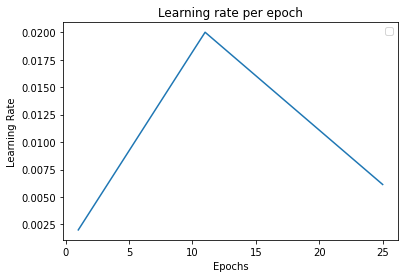

In [0]:
import numpy as np
curves = [{"x":np.arange(1,26), "y": LR, "label": "","xlabel": "Epochs", "ylabel":"Learning Rate"}]
plot_curve(curves,"Learning rate per epoch",Figsize = (6,4))

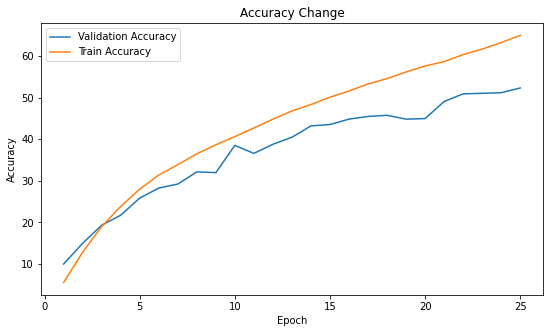

In [0]:
curves = [{"x":np.arange(1,26),"y":test_acc , "label": "Validation Accuracy","xlabel": "Epoch", "ylabel":"Accuracy" },
          {"x":np.arange(1,26),"y":train_acc , "label": "Train Accuracy","xlabel": "Epoch", "ylabel":"Accuracy" },
]
plot_curve(curves,"Accuracy Change",Figsize = (9,5))

In [0]:
url = "tiny-imagenet-200/words.txt"
f = open(url, "r")
words = [None] * 200
for line in f:
  wordclass = line.strip('\n').split('\t')[0]

  if wordclass in classes:
    i = classes.index(line.strip('\n').split('\t')[0])
    words[i] = line.strip('\n').split('\t')[1]

In [0]:
layers = [model.layer1, model.layer2, model.layer3, model.layer4]
miscalssified_images = show_misclassified_images(model, device, testloader, words)
GradCamView(miscalssified_images,model,words,layers,Figsize = (23,30),subplotx1 = 13, subplotx2 = 2)